In [1]:
import os
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
class NodoA:
    def __init__(self, dato):
        self.dato = dato
        self.izq = None
        self.der = None

In [5]:
class ArbolB:
    def __init__(self):
        self.raiz = None

    def insertar(self, dato):
        if self.raiz is None:
            self.raiz = NodoA(dato)
        else:
            self._insertarR(self.raiz, dato)

    def _insertarR(self, actual, dato):
        if dato[1] < actual.dato[1]:
            if actual.izq is None:
                actual.izq = NodoA(dato)
            else:
                self._insertarR(actual.izq, dato)
        else:
            if actual.der is None:
                actual.der = NodoA(dato)
            else:
                self._insertarR(actual.der, dato)

    def inOrden(self, modo):
        self._inOrdenR(self.raiz, modo)

    def _inOrdenR(self, nodo, modo):
        if nodo:
            self._inOrdenR(nodo.izq, modo)
            nombre, valor = nodo.dato
            if modo == "tamaño":
                print(f"{nombre} - {round(valor / 1024, 2)} KB")
            elif modo == "fecha":
                print(f"{nombre} - {datetime.fromtimestamp(valor)}")
            self._inOrdenR(nodo.der, modo)

    def obtener_menor(self):
        actual = self.raiz
        if actual is None:
            return None
        while actual.izq:
            actual = actual.izq
        return actual.dato

    def obtener_mayor(self):
        actual = self.raiz
        if actual is None:
            return None
        while actual.der:
            actual = actual.der
        return actual.dato

    def buscar_rango(self, minimo, maximo, modo):
        print(f"\n🔎 Archivos en el rango especificado ({modo}):")
        resultados = []
        self._buscar_rangoR(self.raiz, minimo, maximo, modo, resultados)
        for nombre, valor in resultados:
            if modo == "tamaño":
                print(f"{nombre} - {round(valor / 1024, 2)} KB")
            else:
                print(f"{nombre} - {datetime.fromtimestamp(valor)}")
        return resultados

    def _buscar_rangoR(self, nodo, minimo, maximo, modo, resultados):
        if nodo:
            valor = nodo.dato[1]
            if valor >= minimo:
                self._buscar_rangoR(nodo.izq, minimo, maximo, modo, resultados)
            if minimo <= valor <= maximo:
                resultados.append(nodo.dato)
            if valor <= maximo:
                self._buscar_rangoR(nodo.der, minimo, maximo, modo, resultados)

    @staticmethod
    def crear_desde_lista(lista_datos):
        nuevo_arbol = ArbolB()
        for dato in lista_datos:
            nuevo_arbol.insertar(dato)
        return nuevo_arbol

    def graficar(self, modo):
        G = nx.DiGraph()
        etiquetas = {}
        self._agregarNodos(G, self.raiz, etiquetas, modo)
        pos = self._posNodos(self.raiz)
        nx.draw(G, pos, labels=etiquetas, with_labels=True,
                node_size=3000, font_size=10, font_color="black")
        plt.title("Árbol Binario (Vista Jerárquica)")
        plt.axis("off")
        plt.show()

    def _agregarNodos(self, G, nodo, etiquetas, modo):
        if nodo:
            nombre, valor = nodo.dato
            if modo == "tamaño":
                etiquetas[nodo] = f"{nombre}\n{round(valor/1024, 2)} KB"
            elif modo == "fecha":
                etiquetas[nodo] = f"{nombre}\n{datetime.fromtimestamp(valor).strftime('%d-%m-%Y')}"
            if nodo.izq:
                G.add_edge(nodo, nodo.izq)
                self._agregarNodos(G, nodo.izq, etiquetas, modo)
            if nodo.der:
                G.add_edge(nodo, nodo.der)
                self._agregarNodos(G, nodo.der, etiquetas, modo)

    def _posNodos(self, nodo, x=0, y=0, pos=None, nivel=1):
        if pos is None:
            pos = {}
        if nodo:
            pos[nodo] = (x, -y)
            if nodo.izq:
                self._posNodos(nodo.izq, x - 1/(2**nivel), y + 1, pos, nivel + 1)
            if nodo.der:
                self._posNodos(nodo.der, x + 1/(2**nivel), y + 1, pos, nivel + 1)
        return pos

¿Cómo deseas ordenar los archivos?
1. Por tamaño
2. Por fecha de modificación


Elige 1 o 2:  1



📂 Archivos ordenados por tamaño:
archivo_muy_pequeño.txt - 0.98 KB
archivo_pequeño.txt - 1.95 KB
archivo_casi_pequeño.txt - 2.93 KB
archivo_mediano.txt - 4.88 KB
base de datos real 122.txt - 6.42 KB
archivo_casi_grande.txt - 6.84 KB
archivo_grande.txt - 8.79 KB
archivo_muy_grande.txt - 10.74 KB

📉 Archivo más liviano: archivo_muy_pequeño.txt - 0.98 KB
📈 Archivo más pesado: archivo_muy_grande.txt - 10.74 KB


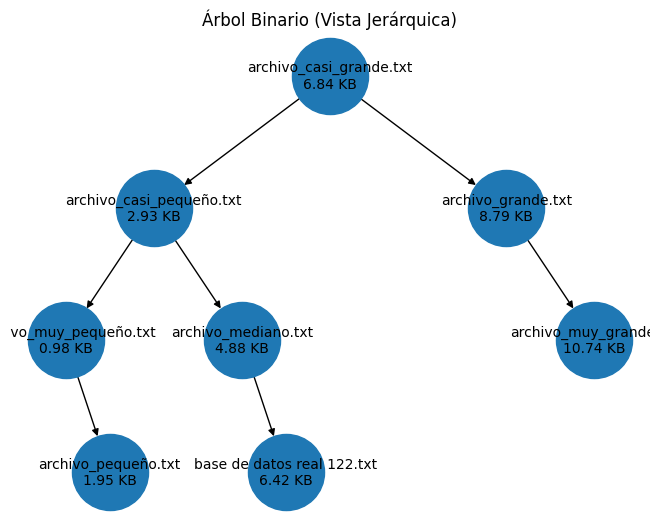


¿Deseas buscar archivos en un rango específico? (s/n)


In [ ]:
carpeta = r"C:\Users\yimmy\Downloads\prueba"

print("¿Cómo deseas ordenar los archivos?")
print("1. Por tamaño")
print("2. Por fecha de modificación")
opcion = input("Elige 1 o 2: ")

modo = "tamaño" if opcion == "1" else "fecha"
arbol = ArbolB()

if not os.path.exists(carpeta):
    print(f"La carpeta '{carpeta}' no existe. Crea una y pon algunos archivos dentro.")
else:
    for archivo in os.listdir(carpeta):
        ruta = os.path.join(carpeta, archivo)
        if os.path.isfile(ruta):
            valor = os.path.getsize(ruta) if modo == "tamaño" else os.path.getmtime(ruta)
            arbol.insertar((archivo, valor))

    print(f"\n📂 Archivos ordenados por {modo}:")
    arbol.inOrden(modo)

    menor = arbol.obtener_menor()
    mayor = arbol.obtener_mayor()

    if menor and mayor:
        if modo == "tamaño":
            print(f"\n📉 Archivo más liviano: {menor[0]} - {round(menor[1]/1024, 2)} KB")
            print(f"📈 Archivo más pesado: {mayor[0]} - {round(mayor[1]/1024, 2)} KB")
        else:
            print(f"\n📅 Archivo más antiguo: {menor[0]} - {datetime.fromtimestamp(menor[1])}")
            print(f"🆕 Archivo más reciente: {mayor[0]} - {datetime.fromtimestamp(mayor[1])}")

    arbol.graficar(modo)
    print("\n¿Deseas buscar archivos en un rango específico? (s/n)")
    if input().lower() == 's':
        print("¿En qué campo deseas buscar por rango?")
        print("1. Tamaño")
        print("2. Fecha")
        opcion_rango = input("Elige 1 o 2: ")

        if opcion_rango == "1":
            min_kb = float(input("Tamaño mínimo (en KB): ")) * 1024
            max_kb = float(input("Tamaño máximo (en KB): ")) * 1024
            resultados = arbol.buscar_rango(min_kb, max_kb, "tamaño")
            if resultados:
                nuevo_arbol = ArbolB.crear_desde_lista(resultados)
                print("\n🌳 Árbol binario solo con archivos del rango:")
                nuevo_arbol.graficar("tamaño")
            else:
                print("❌ No se encontraron archivos en ese rango.")

        elif opcion_rango == "2":
            f1 = input("Fecha mínima (dd-mm-aaaa): ")
            f2 = input("Fecha máxima (dd-mm-aaaa): ")
            try:
                fecha_min = datetime.strptime(f1, "%d-%m-%Y").timestamp()
                fecha_max = datetime.strptime(f2, "%d-%m-%Y").timestamp()
                resultados = arbol.buscar_rango(fecha_min, fecha_max, "fecha")
                if resultados:
                    nuevo_arbol = ArbolB.crear_desde_lista(resultados)
                    print("\n🌳 Árbol binario solo con archivos del rango:")
                    nuevo_arbol.graficar("fecha")
                else:
                    print("❌ No se encontraron archivos en ese rango.")
            except ValueError:
                print("❌ Formato de fecha incorrecto. Usa dd-mm-aaaa.")